Number of simulations: 10000
Starting money: $50
Win amount: $2 (Heads, p=0.5)
Loss amount: $1 (Tails, p=0.5)

Estimated probability of ruin: 0.0000


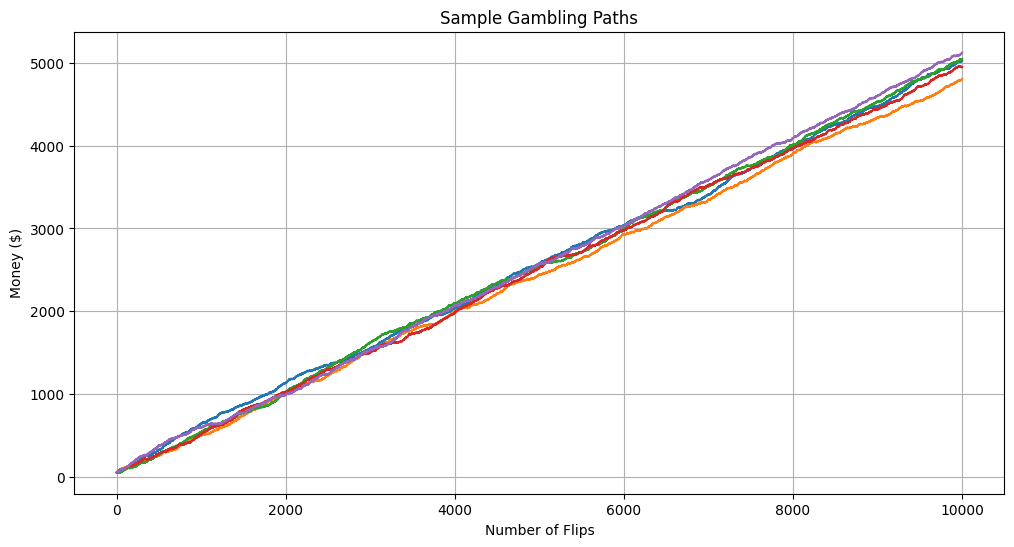


Statistics from 1000 simulations:
Average final amount: $5051.27
Median final amount: $5056.00
Standard deviation: $146.80
Minimum final amount: $4621.00
Maximum final amount: $5506.00


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

def simulate_gambling(starting_money=50, num_flips=10000):
    """
    Simulate one sequence of gambling until either:
    1. Run out of money (return True)
    2. Reach num_flips without running out of money (return False)
    
    Args:
        starting_money (int): Initial amount of money
        num_flips (int): Maximum number of flips to simulate
        
    Returns:
        bool: True if went broke, False if survived num_flips
    """
    money = starting_money
    
    for _ in range(num_flips):
        if money == 0:
            return True
            
        # Flip coin
        if random.random() < 0.5:  # Heads
            money += 2
        else:  # Tails
            money -= 1
            
    return money == 0

def simulate_path(starting_money=50, num_flips=200):
    """
    Simulate one path of the gambling process and return the money at each step
    
    Args:
        starting_money (int): Initial amount of money
        num_flips (int): Number of flips to simulate
        
    Returns:
        list: Money after each flip
    """
    money = starting_money
    path = [money]
    
    for _ in range(num_flips):
        if money == 0:
            path.extend([0] * (num_flips - len(path) + 1))
            break
            
        if random.random() < 0.5:
            money += 2
        else:
            money -= 1
        path.append(money)
        
    return path

def estimate_ruin_probability(starting_money=50, num_simulations=10000):
    """
    Estimate probability of ruin through multiple simulations
    
    Args:
        starting_money (int): Initial amount of money
        num_simulations (int): Number of simulations to run
        
    Returns:
        float: Estimated probability of ruin
    """
    num_ruins = 0
    for _ in range(num_simulations):
        if simulate_gambling(starting_money):
            num_ruins += 1
    return num_ruins / num_simulations

# Set random seed for reproducibility
random.seed(42)

# Run simulation
starting_money = 50
num_simulations = 10000
ruin_prob = estimate_ruin_probability(starting_money, num_simulations)

print(f"Number of simulations: {num_simulations}")
print(f"Starting money: ${starting_money}")
print(f"Win amount: $2 (Heads, p=0.5)")
print(f"Loss amount: $1 (Tails, p=0.5)")
print(f"\nEstimated probability of ruin: {ruin_prob:.4f}")

# Simulate and plot some sample paths
num_paths = 5
num_flips = 200

plt.figure(figsize=(12, 6))
for _ in range(num_paths):
    path = simulate_path(starting_money, num_flips)
    plt.plot(path)

plt.title("Sample Gambling Paths")
plt.xlabel("Number of Flips")
plt.ylabel("Money ($)")
plt.grid(True)
plt.show()

# Calculate some statistics from a larger number of paths
num_stat_paths = 1000
final_amounts = []
for _ in range(num_stat_paths):
    path = simulate_path(starting_money, num_flips)
    final_amounts.append(path[-1])

print("\nStatistics from", num_stat_paths, "simulations:")
print(f"Average final amount: ${np.mean(final_amounts):.2f}")
print(f"Median final amount: ${np.median(final_amounts):.2f}")
print(f"Standard deviation: ${np.std(final_amounts):.2f}")
print(f"Minimum final amount: ${min(final_amounts):.2f}")
print(f"Maximum final amount: ${max(final_amounts):.2f}")

In [3]:
import random
import numpy as np

def simulate_gambling(starting_money=50, max_steps=1000000):
    """
    Simulate gambling until either ruin or max_steps reached.
    Returns True if ruined, False if reached max_steps.
    """
    money = starting_money
    steps = 0
    
    while money > 0 and steps < max_steps:
        if random.random() < 0.5:  # Heads
            money += 2
        else:  # Tails
            money -= 1
        steps += 1
        
        # Optional: add a very large upper bound to prevent infinite growth
        if money > 1000000:  # If we reach a million dollars, consider it "never ruining"
            return False
            
    return money == 0

def estimate_ruin_probability(starting_money=50, num_simulations=10000):
    ruins = 0
    for _ in range(num_simulations):
        if simulate_gambling(starting_money):
            ruins += 1
    return ruins / num_simulations

# Set random seed for reproducibility
random.seed(42)

# Test different starting amounts
starting_amounts = [10, 20, 50, 100]

print("Ruin Probabilities:")
print("-" * 40)
for amount in starting_amounts:
    prob = estimate_ruin_probability(amount)
    print(f"Starting with ${amount}: {prob:.6f}")

Ruin Probabilities:
----------------------------------------
Starting with $10: 0.007900


KeyboardInterrupt: 